Student name: David Schenck<br>
Student pace: Flex<br>
Scheduled project review date/time: <br>
Instructor Name: Morgan Jones<br>
Blog post URL: 

# Project Description

Describe the project here

# Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

The main dataset contains information about the performance of players in the NFL Combine from 2009 to 2019.<br>
Source: https://www.kaggle.com/datasets/redlineracer/nfl-combine-performance-data-2009-2019

Columns in the dataset:
Year: Year player attended combine<br>
Player: Name of player and a unique code used by pro-football-reference.com.<br>
Age: Age of player when they attended the combine.<br>
School: College the player last attended.<br>
Height: Height of player in meters.<br>
Weight: Weight of player in kg.<br>
Sprint_40yd: Time in the 40-yard sprint.<br>
Vertical_Jump: Height of vertical jump in cm.<br>
Bench_Press_Reps: Number of times player could bench press 225 pounds consecutively.<br>
Broad_Jump: Distance player could jump from a standing position in cm.<br>
Agility_3cone: Time to complete 3-cone drill in seconds.<br>
Shuttle: Time to complete the 60-yard shuttle drill in seconds.<br>
Drafted..tm.rnd.yr.: If drafted, it gives the team, round, pick, and year.<br>
BMI: Body mass index.<br>
Player_Type: Offense, defense, or special teams.<br>
Position_Type: Puts positions into categories.<br>
Position: The specific position the player plays.<br>
Drafted: Yes or No.

In [2]:
df_combine = pd.read_csv('./Data/NFL.csv')
df_combine

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,Xavier Crawford,NaN,Central Michigan,1.8034,84.821773,4.48,95.25,11.0,NaN,NaN,NaN,NaN,26.080939,defense,defensive_back,CB,No
3473,2019,Jordan Brown,NaN,South Dakota St.,1.8288,91.172066,4.51,100.33,13.0,325.12,NaN,NaN,NaN,27.260221,defense,defensive_back,CB,No
3474,2019,Corey Ballentine,NaN,Washburn,1.8034,88.904105,4.47,100.33,15.0,342.90,6.82,4.14,NaN,27.336171,defense,defensive_back,CB,No
3475,2019,Ugo Amadi,NaN,Oregon,1.7526,90.264882,4.51,82.55,18.0,292.10,7.21,4.19,NaN,29.386861,defense,defensive_back,S,No


The data below lists each player that made the Pro Bowl from 2009 to 2022. The Pro Bowl is the NFL All-Star team; the best few players at each position are chosen each year. This is a good measure of whether or not a player is succeeding as an NFL player.<br>

The only column in this data that I actually care about is Player-additional. This is a unique code for each player that is also included in the "Player" column in the Combine data. I can use this column to count how many Pro Bowls each player in the combine data has been in.

In [3]:
df_probowl = pd.read_excel('./Data/NFLProBowls.xlsx')
df_probowl

,Pos,Player,Conf,Tm,Age,Yrs,Player-additional,Year
0,QB,Lamar Jackson,AFC,BAL,22,1,JackLa00,2019
1,QB,Russell Wilson,NFC,SEA,31,7,WilsRu00,2019
2,QB,Aaron Rodgers,NFC,GNB,36,14,RodgAa00,2019
3,QB,Deshaun Watson,AFC,HOU,24,2,WatsDe00,2019
4,QB,Patrick Mahomes,AFC,KAN,24,2,MahoPa00,2019
...,...,...,...,...,...,...,...,...
1625,KR,DeSean Jackson,NFC,PHI,23,1,JackDe00,2009
1626,KR,Percy Harvin,NFC,MIN,21,Rook,HarvPe00,2009
1627,KR,Johnny Knox,NFC,CHI,23,Rook,KnoxJo00,2009
1628,SP,Kassim Osgood,AFC,SDG,29,6,OsgoKa00,2009


Below, I split the Player column in the Combine data into the player name and the reference code.<br>
The Player column will now only include the player name. A new column called player_code will hold the reference code.

In [6]:
df_combine['player_code'] = [x[1] if len(x)==2 else None for x in df_combine['Player'].str.split(pat="\\")]
df_combine['Player'] = [x[0] for x in df_combine['Player'].str.split(pat="\\")]
df_combine

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted,player_code
0,2009,Beanie Wells,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes,WellCh00
1,2009,Will Davis,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes,DaviWi99
2,2009,Herman Johnson,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes,JohnHe23
3,2009,Rashad Johnson,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes,JohnRa98
4,2009,Cody Brown,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes,BrowCo96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,Xavier Crawford,NaN,Central Michigan,1.8034,84.821773,4.48,95.25,11.0,NaN,NaN,NaN,NaN,26.080939,defense,defensive_back,CB,No,None
3473,2019,Jordan Brown,NaN,South Dakota St.,1.8288,91.172066,4.51,100.33,13.0,325.12,NaN,NaN,NaN,27.260221,defense,defensive_back,CB,No,None
3474,2019,Corey Ballentine,NaN,Washburn,1.8034,88.904105,4.47,100.33,15.0,342.90,6.82,4.14,NaN,27.336171,defense,defensive_back,CB,No,None
3475,2019,Ugo Amadi,NaN,Oregon,1.7526,90.264882,4.51,82.55,18.0,292.10,7.21,4.19,NaN,29.386861,defense,defensive_back,S,No,None


Next, I create another column that counts the number of Pro Bowls for each player.

In [7]:
df_combine['pro_bowls'] = df_combine['player_code'].apply(lambda x: sum(df_probowl['Player-additional']==x))
df_combine

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted,player_code,pro_bowls
0,2009,Beanie Wells,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes,WellCh00,0
1,2009,Will Davis,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes,DaviWi99,0
2,2009,Herman Johnson,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes,JohnHe23,0
3,2009,Rashad Johnson,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes,JohnRa98,0
4,2009,Cody Brown,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes,BrowCo96,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,2019,Xavier Crawford,NaN,Central Michigan,1.8034,84.821773,4.48,95.25,11.0,NaN,NaN,NaN,NaN,26.080939,defense,defensive_back,CB,No,None,0
3473,2019,Jordan Brown,NaN,South Dakota St.,1.8288,91.172066,4.51,100.33,13.0,325.12,NaN,NaN,NaN,27.260221,defense,defensive_back,CB,No,None,0
3474,2019,Corey Ballentine,NaN,Washburn,1.8034,88.904105,4.47,100.33,15.0,342.90,6.82,4.14,NaN,27.336171,defense,defensive_back,CB,No,None,0
3475,2019,Ugo Amadi,NaN,Oregon,1.7526,90.264882,4.51,82.55,18.0,292.10,7.21,4.19,NaN,29.386861,defense,defensive_back,S,No,None,0


Below, I change the Drafted column from "Yes" and "No" to 1 and 0.

In [8]:
df_combine['Drafted'].replace({'No':0, 'Yes':1}, inplace=True)

### DUPLICATES:
Below, I look to see if any players are repeated in the data.

In [11]:
df_combine['player_code'].value_counts()

MoeaTo00    1
HamiCo00    1
HartBo00    1
DaniCh00    1
DialQu00    1
           ..
RudoKy00    1
SmitSh22    1
WhitPa01    1
GodwCh00    1
MartMa01    1
Name: player_code, Length: 3073, dtype: int64

Each player code appears once, so there are no duplicates in the data.

### Data Info and Basic Stats
Look at the data columns and basic statistics for numerical data.

In [9]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3477 non-null   int64  
 1   Player               3477 non-null   object 
 2   Age                  2927 non-null   float64
 3   School               3477 non-null   object 
 4   Height               3477 non-null   float64
 5   Weight               3477 non-null   float64
 6   Sprint_40yd          3303 non-null   float64
 7   Vertical_Jump        2780 non-null   float64
 8   Bench_Press_Reps     2572 non-null   float64
 9   Broad_Jump           2749 non-null   float64
 10  Agility_3cone        2260 non-null   float64
 11  Shuttle              2337 non-null   float64
 12  Drafted..tm.rnd.yr.  2254 non-null   object 
 13  BMI                  3477 non-null   float64
 14  Player_Type          3477 non-null   object 
 15  Position_Type        3477 non-null   o

There are 3477 players listed in the data.<br>
There is some missing data.<br>
550 players do not have an age listed.<br>
174 players do not have a 40-yard sprint time.<br>
697 players do not have a vertical jump recorded.<br>
905 players do not have a number of bench press reps recorded.<br>
728 players do not have a broad jump recorded.<br>
1217 players do not have a time for the 3-cone drill.<br>
1140 players do not have a time for the 60-yard shuttle.<br>
1223 players have NaN for the Drafted..tm.rnd.yr column. This is not actually missing data. It just means they were not drafted.<br>
404 players do not have a player code. This is not surprising because players who never made it to the NFL will not be given a player code by pro-football-reference.com. This also shows that some players (in fact, a significant number of them) made it to the NFL despite not being drafted.<br>

In [10]:
df_combine.describe()

,Year,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Drafted,pro_bowls
count,3477.000000,2927.000000,3477.000000,3477.000000,3303.000000,2780.000000,2572.000000,2749.000000,2260.000000,2337.000000,3477.000000,3477.000000,3477.000000
mean,2013.823699,21.983259,1.873968,109.746393,4.769080,83.392403,20.241058,291.629698,7.237416,4.403843,31.074417,0.648260,0.238136
std,3.075616,0.969490,0.067494,20.483780,0.301477,10.678403,6.497600,23.960879,0.410230,0.265224,4.438279,0.477582,0.949657
min,2009.000000,18.000000,1.651000,67.585263,4.220000,44.450000,2.000000,198.120000,6.280000,3.810000,21.609798,0.000000,0.000000
25%,2011.000000,21.000000,1.828800,92.986436,4.530000,76.200000,15.000000,276.860000,6.940000,4.200000,27.475641,0.000000,0.000000
50%,2014.000000,22.000000,1.879600,104.779837,4.690000,83.820000,20.000000,294.640000,7.140000,4.360000,30.122626,1.000000,0.000000
75%,2016.000000,23.000000,1.930400,125.645087,4.960000,90.170000,25.000000,307.340000,7.490000,4.560000,34.038647,1.000000,0.000000
max,2019.000000,28.000000,2.082800,167.375585,6.000000,114.300000,49.000000,373.380000,9.040000,5.560000,44.680097,1.000000,10.000000


Things I noticed from the table above:<br>
64.8% of players who attend the combine end up being drafted.<br>

The scale is quite different different drills. For example, the slowest 40-yard sprint was 6 seconds, but the shortest broad jump was 198.12 cm. For certain types of classification techniques, rescaling will be needed.<br>

The means and medians for the 6 drills do not differ that much. I will look at the actual distributions, but this indicates that the distributions are somewhat symmetric. This could be important if I choose to do a Naive Bayes classifier using a Gaussian probability density.

Ideally, every player in the data would have participated in all 6 drills. However, that is not the case here. Let's see what happens if I cut out all players that have at least one drill missing.<br>
First, I create a column called Missing_Athletic_Tests that lists how many of the 6 drills have NaN.

In [12]:
df_combine['Missing_Athletic_Tests'] = np.sum(df_combine[['Sprint_40yd',
                                                          'Vertical_Jump',
                                                          'Bench_Press_Reps',
                                                          'Broad_Jump',
                                                          'Agility_3cone',
                                                          'Shuttle']].isna(), axis=1)

Next, I look at the basic stats for players who completed all 6 drills.

In [13]:
df_combine[df_combine['Missing_Athletic_Tests'] == 0].describe()

,Year,Age,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,BMI,Drafted,pro_bowls,Missing_Athletic_Tests
count,1731.000000,1497.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.000000,1731.0
mean,2013.569035,21.977288,1.876313,112.486977,4.777048,83.216915,20.476603,290.375852,7.247522,4.410462,31.754684,0.685153,0.271519,0.0
std,3.032817,0.929043,0.068784,21.152118,0.316908,10.855165,6.516577,24.564610,0.419853,0.268545,4.528483,0.464589,1.031970,0.0
min,2009.000000,20.000000,1.651000,75.296333,4.260000,49.530000,2.000000,208.280000,6.280000,3.810000,23.220163,0.000000,0.000000,0.0
25%,2011.000000,21.000000,1.828800,93.440028,4.530000,76.200000,16.000000,274.320000,6.935000,4.200000,27.884261,0.000000,0.000000,0.0
50%,2013.000000,22.000000,1.879600,109.769353,4.680000,83.820000,20.000000,294.640000,7.150000,4.370000,30.863588,1.000000,0.000000,0.0
75%,2016.000000,23.000000,1.930400,135.624119,5.005000,91.440000,25.000000,307.340000,7.520000,4.585000,35.817668,1.000000,0.000000,0.0
max,2019.000000,26.000000,2.057400,167.375585,6.000000,114.300000,44.000000,355.600000,9.040000,5.560000,44.461334,1.000000,10.000000,0.0


In [18]:
for n in range(7):
    print(f"{sum(df_combine['Missing_Athletic_Tests'] == n)} players missed exactly {n} athletic test(s).")

1731 players missed exactly 0 athletic test(s).
567 players missed exactly 1 athletic test(s).
348 players missed exactly 2 athletic test(s).
164 players missed exactly 3 athletic test(s).
296 players missed exactly 4 athletic test(s).
304 players missed exactly 5 athletic test(s).
67 players missed exactly 6 athletic test(s).


Out of 3477 players, 1731 completed all 6 tests (this is 49.8%). While this sample is still large enough to gain some insights, it feels a bit too strict to cut that much data. There is still information to be gained from those who completed some, but not all of the drills. Also, there are players who did not complete any of the drills who might still be relevant. An example of this is Kyler Murray, currently quarterback for the Arizona Cardinals. He did not participate in the Combine, but was still drafted with the first overall pick. This shows that missing the Combine or missing some tests does not preclude a player from being drafted.<br>

Rather than cutting players who have missing tests, it might be more appropriate to impute values. Rather than imputing values now, I think it would be more appropriate to handle the imputing on a case-by-case basis for each classifier I use. The reason for this is that some classifiers can handle missing data on their own (like XGBoost) while others cannot work if missing data is included (like K Nearest Neighbors).<br>

When I do impute values, I don't just want to use the mean or median for that column. The data includes different football positions with different body types. The average 40-yard sprint time would probably be too slow for the average cornerback, but way too fast for the average offensive lineman. A more accurate way to impute values is to take the mean or median for each position separately.

### School
The last college each player attended is listed in the School column.
Let's look at whether or not players from different schools tend to get drafted.

In [21]:
for i,school in enumerate(df_combine['School'].value_counts().index):
    ydrafted = sum((df_combine['School']==school) & (df_combine['Drafted']==1))
    ndrafted = sum((df_combine['School']==school) & (df_combine['Drafted']==0))
    print(f"{i} \t {ydrafted} \t {ndrafted} \t {np.round(ydrafted / (ydrafted+ndrafted),3)} \t {school}")

0 	 76 	 25 	 0.752 	 Alabama
1 	 61 	 34 	 0.642 	 LSU
2 	 62 	 20 	 0.756 	 Ohio St.
3 	 54 	 25 	 0.684 	 USC
4 	 58 	 18 	 0.763 	 Florida
5 	 50 	 21 	 0.704 	 Florida St.
6 	 53 	 15 	 0.779 	 Georgia
7 	 51 	 17 	 0.75 	 Oklahoma
8 	 50 	 16 	 0.758 	 Clemson
9 	 46 	 19 	 0.708 	 Miami (FL)
10 	 41 	 17 	 0.707 	 Notre Dame
11 	 39 	 17 	 0.696 	 Stanford
12 	 38 	 17 	 0.691 	 Iowa
13 	 38 	 15 	 0.717 	 Penn St.
14 	 34 	 17 	 0.667 	 Wisconsin
15 	 35 	 16 	 0.686 	 North Carolina
16 	 35 	 15 	 0.7 	 South Carolina
17 	 30 	 19 	 0.612 	 Texas A&M
18 	 30 	 19 	 0.612 	 Oregon
19 	 27 	 21 	 0.562 	 Auburn
20 	 30 	 17 	 0.638 	 Utah
21 	 28 	 19 	 0.596 	 Virginia Tech
22 	 25 	 22 	 0.532 	 Michigan St.
23 	 33 	 13 	 0.717 	 UCLA
24 	 28 	 17 	 0.622 	 Arkansas
25 	 29 	 15 	 0.659 	 Texas
26 	 31 	 12 	 0.721 	 Nebraska
27 	 28 	 14 	 0.667 	 West Virginia
28 	 31 	 11 	 0.738 	 Michigan
29 	 24 	 16 	 0.6 	 Missouri
30 	 30 	 10 	 0.75 	 Washington
31 	 28 	 11 	 0.718

There are 253 unique schools listed. I do not think it is wise to actually treat each one of these as a separate category when fitting classifiers. Instead, it would make more sense to divide the schools into groups depending on how big their football program is. The easiest way to define these groups is to simply see how many players they send to the combine. The heavy-hitters in college football like Alabama, Ohio State, Georgia, and Notre Dame send lots of players. Let's see if the more well-represented schools have a higher rate of being drafted compared to the less-well represented schools.<br>

I define three groups:<br>
Group 1: The top 20 most represented schools. Includes 1291 players. Each school has at least 48 players.<br>
Group 2: The next 30 most represented schools. Includes 1091 players. Each school has at least 25 players.<br>
Group 3: The rest of the schools (203 total). Includes 1095 players. Each school has at least 1 player.

In [29]:
ydrafted = [sum((df_combine['School']==sch) & (df_combine['Drafted']==1))
            for sch in df_combine['School'].value_counts().index]
ndrafted = [sum((df_combine['School']==sch) & (df_combine['Drafted']==0))
            for sch in df_combine['School'].value_counts().index]

print('Group 1:',sum(ydrafted[0:20])/(sum(ydrafted[0:20])+sum(ndrafted[0:20])))
print('Group 2:',sum(ydrafted[20:50])/(sum(ydrafted[20:50])+sum(ndrafted[20:50])))
print('Group 3:',sum(ydrafted[50:])/(sum(ydrafted[50:])+sum(ndrafted[50:])))

Group 1: 0.7033307513555384
Group 2: 0.6507791017415215
Group 3: 0.5808219178082191


It does look like the bigger college football programs have a higher conversion rate for getting their players drafted.<br>
70.3% of the players from Group 1 schools got drafted.<br>
65.1% of the players from Group 2 schools got drafted.<br>
58.1% of the players from Group 3 schools got drafted.<br>

Below, I create a new column to indicate the group the player's school is in. These can be used as categories for a classifier.

In [34]:
df_combine['school_group'] = [1 if df_combine['School'].value_counts()[x] > 47 
                              else 2 if df_combine['School'].value_counts()[x] > 24
                              else 3 for x in df_combine['School']]

### Trends in the data

Below, I look at how the different columns in the data relate to whether a player was drafted.

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value enco

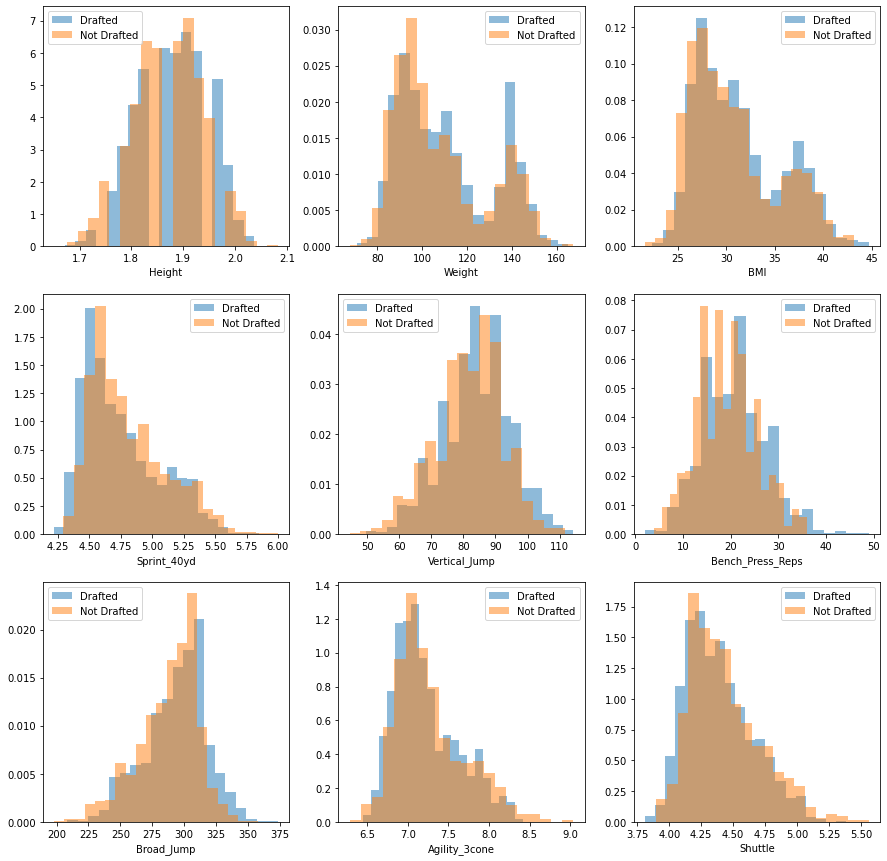

In [38]:
# Histograms of numerical data
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

cols = ['Height','Weight','BMI','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle']

for i, col in enumerate(cols):
    r = i//3
    c = i%3
    
    ax[r,c].hist(df_combine[df_combine['Drafted']==1][col],bins=20,alpha=0.5,density=True,label='Drafted')
    ax[r,c].hist(df_combine[df_combine['Drafted']==0][col],bins=20,alpha=0.5,density=True,label='Not Drafted')
    ax[r,c].set_xlabel(col)
    ax[r,c].legend()

The distributions above show some very subtle differences, but it can be hard to see. Part of the reason for this might be that all the different positions are being mixed together. It might be easier to see differences if we separate the players by position.<br>

Below, I plot split violin plots for each numerical column separated by position. The violins are split so that the distribution of undrafted players is on the left and the distribution of drafted players is on the right. I also obtain the p-value for a Kolmogorov-Smirnov test to help determine which distributions are different.

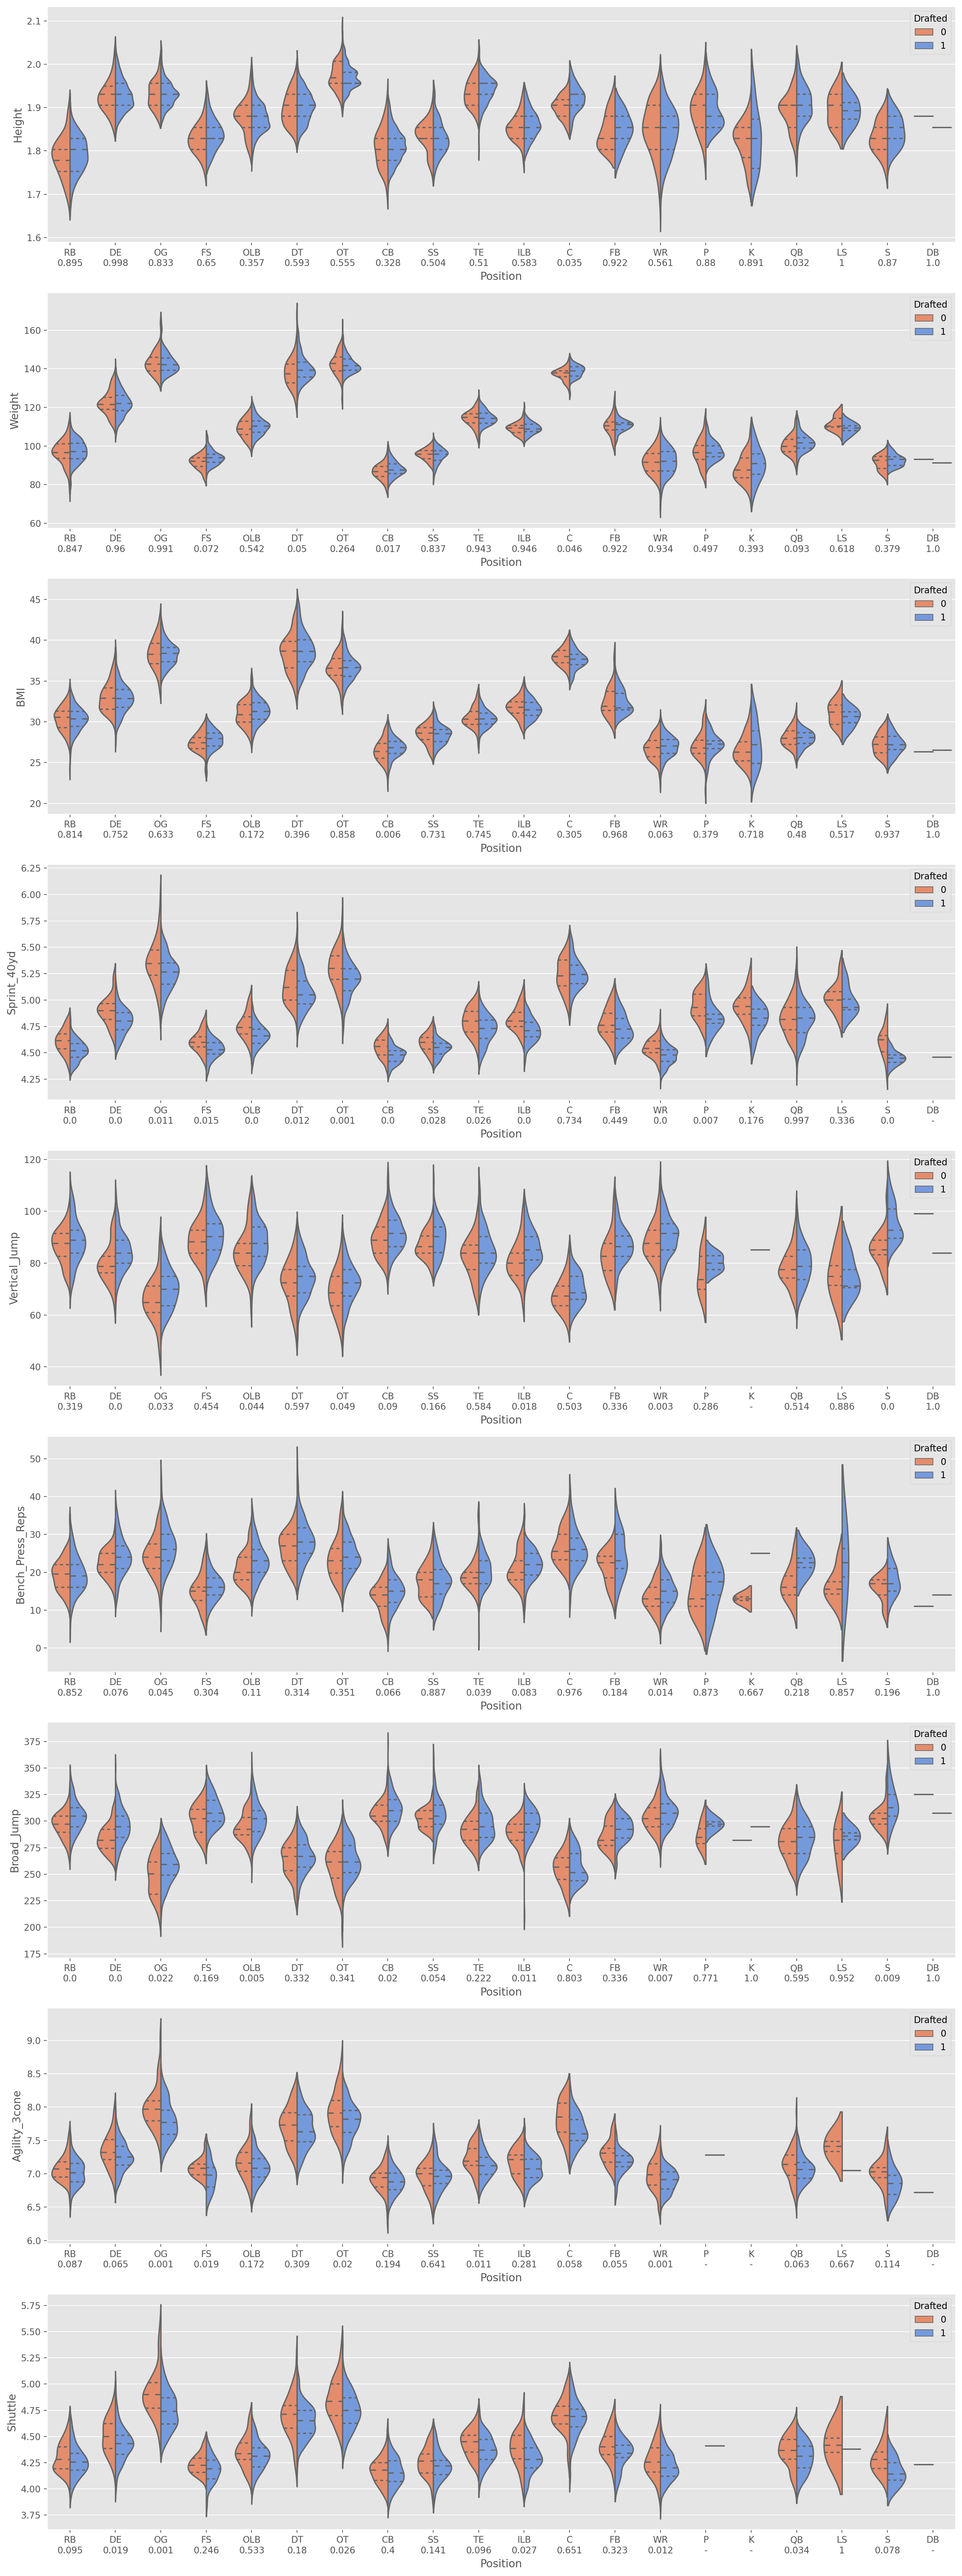

In [85]:
# Violin plots for each athletic test and each position
fig, ax = plt.subplots(nrows=9, figsize=(15,40), dpi=200)
plt.style.use('ggplot')

cols = ['Height','Weight','BMI','Sprint_40yd','Vertical_Jump','Bench_Press_Reps','Broad_Jump','Agility_3cone','Shuttle']

for i, col in enumerate(cols):
    sns.violinplot(data=df_combine, x='Position', y=col, hue='Drafted', split=True, inner='quartile',
                   palette=['#f88458', '#6495ed'], ax=ax[i])
    ks_results = []
    for j, pos in enumerate(df_combine['Position'].unique()):
        try:
            ks_result = st.ks_2samp(df_combine[(df_combine['Drafted']==1) &
                                               (df_combine[col].isna()==False) &
                                               (df_combine['Position']==pos)][col],
                                    df_combine[(df_combine['Drafted']==0) &
                                               (df_combine[col].isna()==False) &
                                               (df_combine['Position']==pos)][col])
            ks_results.append(ks_result[1])
        except:
            ks_results.append("-")
    ax[i].set_xticklabels([f"{pos}\n{ks}" if ks=="-" else f"{pos}\n{round(ks,3)}" for pos, ks in zip(df_combine['Position'].unique(),ks_results)])
            
fig.tight_layout()

First, plotting the distributions for each position separately shows the drastic differences in performance on certain tests.
The classifiers will be much more accurate if the positions are taken into account.<br>

Second, there are visible differences between the drafted and undrafted players in many cases. For example, for positions where speed is considered important (wide receiver, running back, safety, cornerback), the drafted players ran the 40-yard sprint about a tenth of a second faster, a significant difference given the spread in the values is on the order of a tenth of a second.<br>

The plots indicate that the results of the combine are going to have predictive power when trying to tell who will get drafted.